[0.00e+00 1.00e-06 2.00e-06 3.00e-06 4.00e-06 6.00e-06 8.00e-06 1.20e-05
 1.70e-05 2.60e-05 3.60e-05 5.30e-05 8.00e-05 1.18e-04 1.76e-04 2.77e-04]


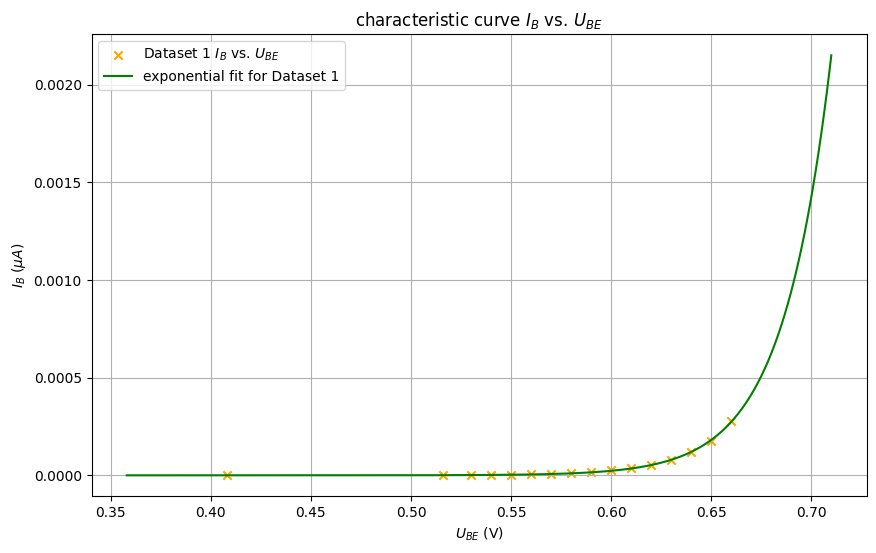

41.23482244969704
0.5051834718561604
Steigung des linearen Fits für den kleinen Datensatz: 0.000322 muA/V
Steigung des linearen Fits für die gefilterten Punkte (540-570 mV): 170.000000 muA/V
L-Parameter: 41.23482244969704


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Gegebene Daten Tangente
U_CE_KennlinieI_B = 5.64  # V
I_B_KennlinieI_B_T = np.array([6, 7, 9, 10, 14], dtype=float)  # µA
U_BE_KennlinieI_B_T = np.array([545, 550, 555, 560, 570], dtype=float) #mV

# Großer Datensatz
I_B_KennlinieI_B = np.array([0, 1, 2, 3, 4, 6, 8, 12, 17, 26, 36, 53, 80, 118, 176, 277], dtype=float)  # µA
U_BE_KennlinieI_B = np.array([408, 516, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660], dtype=float)  # mV

# Umrechnung der Einheiten
U_BE_KennlinieI_B_V = U_BE_KennlinieI_B / 1000.0  # mV -> V
I_B_KennlinieI_B_A = I_B_KennlinieI_B / (1000.0 * 1000.0)  # µA -> A

print(I_B_KennlinieI_B_A)

U_BE_KennlinieI_B_V_T = U_BE_KennlinieI_B_T / 1000  # mV -> V
I_B_KennlinieI_B_A_T = I_B_KennlinieI_B_T  / (1000.0 * 1000.0) # µA -> A

# Theoriefunktion für den Fit (Exponentialfunktion)
def I_B_expU_BE(U_BE_KennlinieI_B, L, amplitude):
    return amplitude * np.exp(L * U_BE_KennlinieI_B)

# Fit für den großen Datensatz mit einer Exponentialfunktion
popt_exp, pcov_exp = curve_fit(I_B_expU_BE, U_BE_KennlinieI_B_V, I_B_KennlinieI_B_A)
L_exp = popt_exp[0]
L_exp_err = np.sqrt(np.diag(pcov_exp))[0]

amplitudeFitted = popt_exp[1]

# Fit für den kleinen Datensatz mit einer linearen Funktion
slope_small, intercept_small, r_value, p_value, std_err = linregress(U_BE_KennlinieI_B_V_T, I_B_KennlinieI_B_A_T)



# Filter für die Punkte von 540 mV bis 570 mV im großen Datensatz
mask = (U_BE_KennlinieI_B >= 540) & (U_BE_KennlinieI_B <= 570)
U_BE_filtered = U_BE_KennlinieI_B[mask] / 1000  # in V
I_B_filtered = I_B_KennlinieI_B[mask]  # in A


U_BE_fit_range_small = np.linspace(min(U_BE_KennlinieI_B_V) - 0.05, max(U_BE_KennlinieI_B_V) + 0.05, 500)
U_BE_fit_range_filtered = np.linspace(min(U_BE_filtered) - 0.05, max(U_BE_filtered) + 0.05, 500)

# Fit für die gefilterten Punkte mit einer linearen Funktion
slope_filtered, intercept_filtered, r_value, p_value, std_err = linregress(U_BE_filtered, I_B_filtered)

# Daten plotten
plt.figure(figsize=(10, 6))
plt.scatter(U_BE_KennlinieI_B_V, I_B_KennlinieI_B_A, marker='x', color='orange', label='Dataset 1 $I_B$ vs. $U_{BE}$')
#plt.scatter(U_BE_KennlinieI_B_V_T, I_B_KennlinieI_B_A_T, 'x', color='blue', label='Dataset Tangent')

# Gefittete Kurven plotten
plt.plot(U_BE_fit_range_small, I_B_expU_BE(U_BE_fit_range_small, L_exp, amplitudeFitted), '-', color='green', label='exponential fit for Dataset 1')

#plt.plot(U_BE_fit_range_small, slope_small * U_BE_fit_range_small + intercept_small, '-', color='red', label='tangent for the tangent Dataset at working point = 551mV')
#plt.plot(U_BE_fit_range_filtered, slope_filtered * U_BE_fit_range_filtered + intercept_filtered, '-', color='purple', label='tangent for Dataset 1 at working point = 551mV')

#plt.plot(U_BE_KennlinieI_B_V_T, slope_small * U_BE_KennlinieI_B_V_T + intercept_small, '-', color='red', label='Linearer Fit kleiner Datensatz')
#plt.plot(U_BE_filtered, slope_filtered * U_BE_filtered + intercept_filtered, '-', color='purple', label='Linearer Fit gefilterte Punkte (540-570 mV)')

plt.xlabel(r'$U_{BE}$ (V)')
plt.ylabel(r'$I_B$ ($\mu A$)')
plt.title(r'characteristic curve $I_B$ vs. $U_{BE}$')
plt.grid(True)
plt.legend()
plt.show()

print(L_exp)
print(L_exp_err)

# Ausgabe der Steigungen
print(f'Steigung des linearen Fits für den kleinen Datensatz: {slope_small:.6f} muA/V')
print(f'Steigung des linearen Fits für die gefilterten Punkte (540-570 mV): {slope_filtered:.6f} muA/V')

print("L-Parameter: {}".format(L_exp))